In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
Web_data_1 = pd.read_csv("/Users/levinschily/Desktop/IRONHACK/Week5/project/df_final_web_data_pt_1.txt")
Web_data_2 = pd.read_csv('/Users/levinschily/Desktop/IRONHACK/Week5/project/df_final_web_data_pt_2.txt')
Final_demo = pd.read_csv('/Users/levinschily/Desktop/IRONHACK/Week5/project/df_final_demo.txt')
Clients = pd.read_csv('/Users/levinschily/Desktop/IRONHACK/Week5/project/df_final_experiment_clients.txt')

In [4]:
combined_df = pd.concat([Web_data_1, Web_data_2], ignore_index=True)
combined_df.drop_duplicates()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [5]:
merged = combined_df.merge(Clients, on='client_id', how='inner')

In [6]:
df = merged.merge(Final_demo, on='client_id', how='inner')
df.drop_duplicates()
display(df)

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449826,9895983,473024645_56027518531,498981662_93503779869_272484,step_3,2017-06-15 19:52:09,NaN,10.0,121.0,49.0,M,2.0,97748.22,2.0,2.0
449827,9895983,473024645_56027518531,498981662_93503779869_272484,step_2,2017-06-15 19:50:37,NaN,10.0,121.0,49.0,M,2.0,97748.22,2.0,2.0
449828,9895983,473024645_56027518531,498981662_93503779869_272484,step_1,2017-06-15 19:50:05,NaN,10.0,121.0,49.0,M,2.0,97748.22,2.0,2.0
449829,9895983,473024645_56027518531,498981662_93503779869_272484,start,2017-06-15 19:50:00,NaN,10.0,121.0,49.0,M,2.0,97748.22,2.0,2.0


In [7]:
df["Variation"].value_counts()

Variation
Test       177847
Control    143462
Name: count, dtype: int64

In [8]:
df["Variation"].isna().sum()

np.int64(128522)

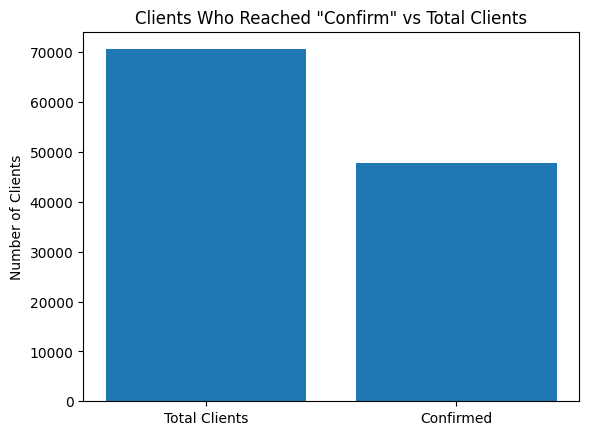

In [9]:
total_clients = df['client_id'].nunique()

confirmed_clients = df[df['process_step'] == 'confirm']['client_id'].nunique()

labels = ['Total Clients', 'Confirmed']
values = [total_clients, confirmed_clients]

plt.bar(labels, values)
plt.ylabel('Number of Clients')
plt.title('Clients Who Reached "Confirm" vs Total Clients')
plt.show()

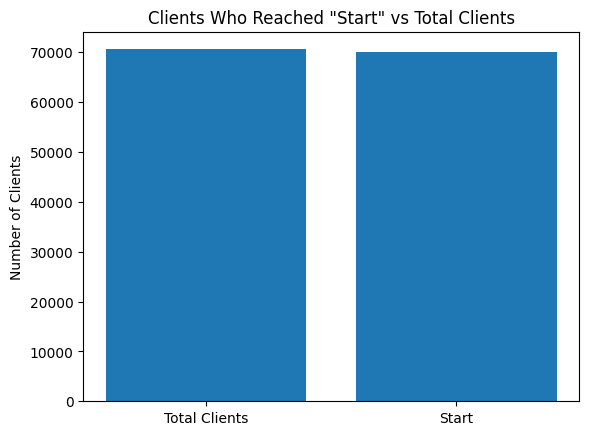

In [25]:
total_clients = df['client_id'].nunique()

confirmed_clients = df[df['process_step'] == 'start']['client_id'].nunique()

labels = ['Total Clients', 'Start']
values = [total_clients, confirmed_clients]

plt.bar(labels, values)
plt.ylabel('Number of Clients')
plt.title('Clients Who Reached "Start" vs Total Clients')
plt.show()

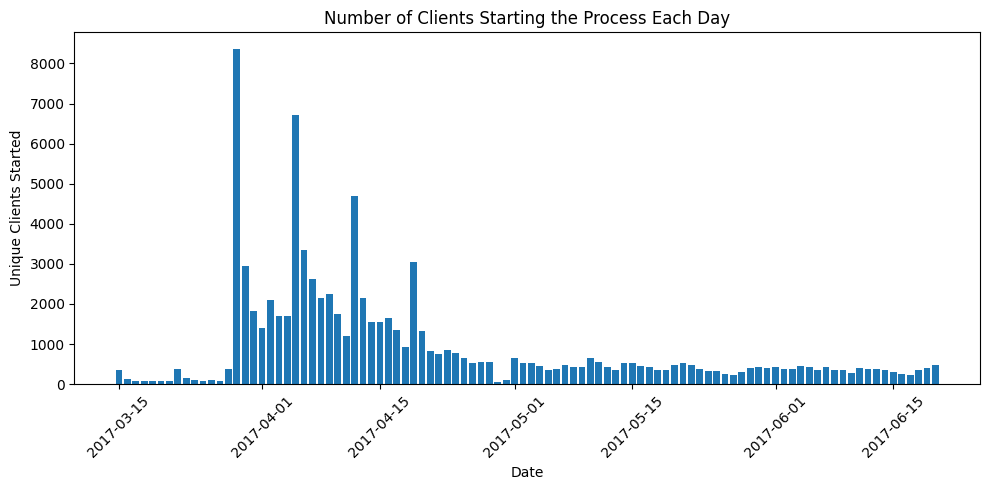

In [10]:
df['date_time'] = pd.to_datetime(df['date_time'])

df['date'] = df['date_time'].dt.date

starts = df[df['process_step'] == 'start']

starts_by_date = starts.groupby('date')['client_id'].nunique().reset_index()
starts_by_date.columns = ['date', 'num_starts']

plt.figure(figsize=(10, 5))
plt.bar(starts_by_date['date'], starts_by_date['num_starts'])
plt.title('Number of Clients Starting the Process Each Day')
plt.xlabel('Date')
plt.ylabel('Unique Clients Started')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

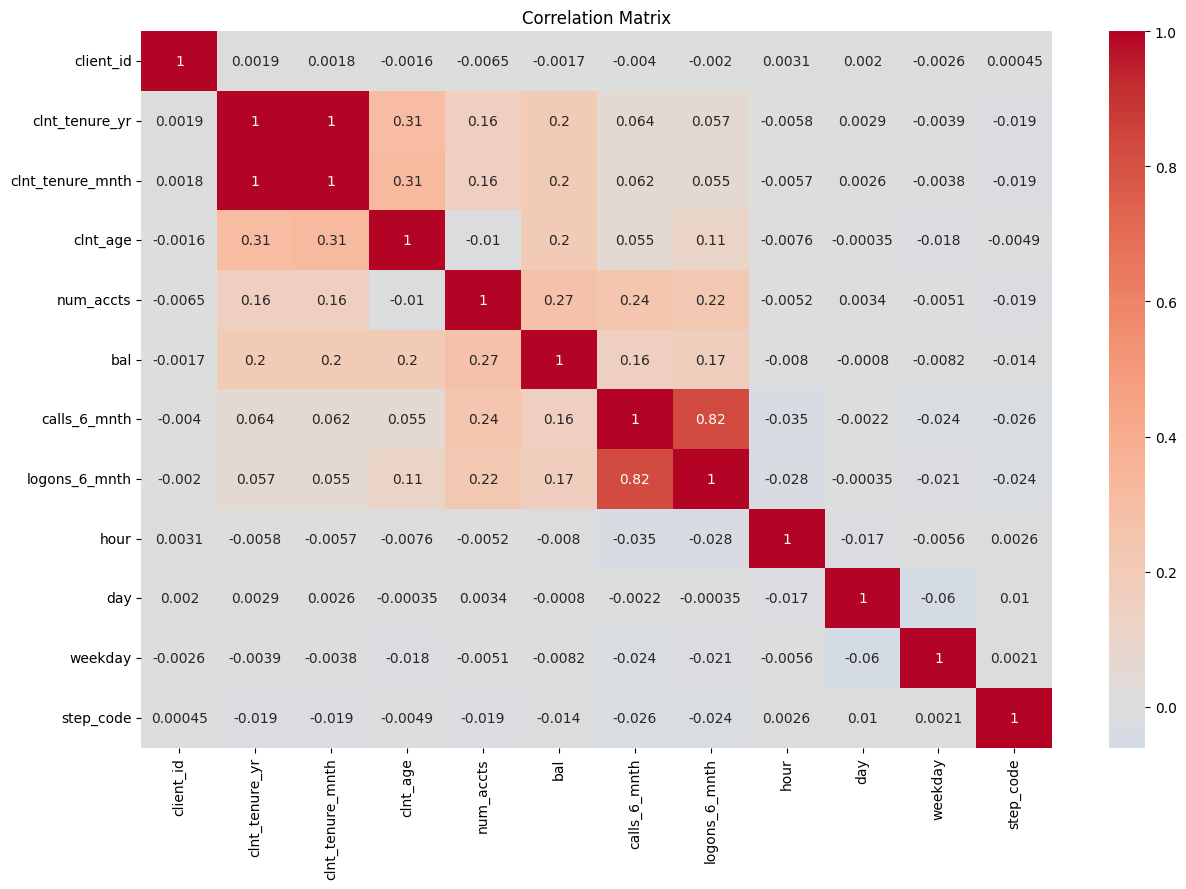

In [15]:
df['date_time'] = pd.to_datetime(df['date_time'])

df['hour'] = df['date_time'].dt.hour
df['day'] = df['date_time'].dt.day
df['weekday'] = df['date_time'].dt.weekday

df['step_code'] = df['process_step'].astype('category').cat.codes
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(13, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [17]:
corr = df.corr(numeric_only=True).unstack()
corr = corr[corr.index.get_level_values(0) != corr.index.get_level_values(1)]
corr = corr.sort_values(key=abs, ascending=False).drop_duplicates()
print(corr.head(5))

clnt_tenure_yr    clnt_tenure_mnth    0.998980
calls_6_mnth      logons_6_mnth       0.822340
clnt_tenure_mnth  clnt_age            0.312461
clnt_tenure_yr    clnt_age            0.312108
bal               num_accts           0.271350
dtype: float64


In [19]:
df.describe()

,client_id,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth,hour,day,weekday,step_code
count,4.498310e+05,449831,449716.000000,449716.000000,449704.000000,449716.000000,4.497160e+05,449716.000000,449716.000000,449831.000000,449831.000000,449831.000000,449831.000000
mean,5.002870e+06,2017-04-20 03:14:29.206960128,12.234130,152.810921,47.653966,2.264767,1.597737e+05,3.529176,5.709877,13.814373,14.951502,2.789330,1.887289
min,1.690000e+02,2017-03-15 00:03:03,2.000000,33.000000,13.500000,1.000000,1.378942e+04,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,2.515550e+06,2017-04-04 16:29:48,6.000000,82.000000,33.500000,2.000000,3.844801e+04,2.000000,4.000000,11.000000,6.000000,2.000000,1.000000
50%,5.025522e+06,2017-04-12 14:17:37,11.000000,139.000000,49.000000,2.000000,6.677490e+04,3.000000,6.000000,13.000000,13.000000,2.000000,2.000000
75%,7.468377e+06,2017-04-30 22:28:35.500000,16.000000,194.000000,60.000000,2.000000,1.490039e+05,6.000000,8.000000,17.000000,23.000000,4.000000,3.000000
max,9.999839e+06,2017-06-20 23:57:06,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000,23.000000,31.000000,6.000000,4.000000
std,2.873031e+06,NaN,7.005183,83.719616,15.742089,0.543074,3.420694e+05,2.242472,2.356178,4.854713,9.353309,1.774341,1.277868


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449831 entries, 0 to 449830
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   client_id         449831 non-null  int64         
 1   visitor_id        449831 non-null  object        
 2   visit_id          449831 non-null  object        
 3   process_step      449831 non-null  object        
 4   date_time         449831 non-null  datetime64[ns]
 5   Variation         321309 non-null  object        
 6   clnt_tenure_yr    449716 non-null  float64       
 7   clnt_tenure_mnth  449716 non-null  float64       
 8   clnt_age          449704 non-null  float64       
 9   gendr             449716 non-null  object        
 10  num_accts         449716 non-null  float64       
 11  bal               449716 non-null  float64       
 12  calls_6_mnth      449716 non-null  float64       
 13  logons_6_mnth     449716 non-null  float64       
 14  date

In [ ]:
# KPIs

#1. Completion Rate (Conversion Rate)
# -> % of users who reached the final process_step ("confirm")

#2. Time to Completion (Duration)

#3. 4. Drop-off Rate at Each Step
# -> % of users who leave at each step (e.g., start → middle, middle → confirm)

#4. Engagement Metrics
# -> Logins in last 6 months (logons_6_mnth)
# -> Calls in last 6 months (calls_6_mnth)
# -> Number of accounts 